In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [65]:
font_path = "C:/Windows/Fonts/gulim.ttc"
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)              # 설정에 해당하는 rc params 변경

In [66]:
df = pd.read_csv('../data/training/TL_csv/tn_lodge_consume_his_숙박소비내역_E.csv')
df

,TRAVEL_ID,LODGING_NM,LODGING_PAYMENT_SEQ,LODGING_TYPE_CD,RSVT_YN,CHK_IN_DT_MIN,CHK_OUT_DT_MIN,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC
0,e_e000013,해브펀캠핑어라운드,0,5,Y,NaN,NaN,4,NaN,NaN,경기 파주시 월롱면 도감로 130,경기 파주시 월롱면 위전리 89-1,NaN,NaN,NaN,1,240000,NaN
1,e_e000020,파로티아워터하우스,1,1,Y,NaN,NaN,1,NaN,아고다,서울 중구 을지로 100,서울 중구 을지로2가 203,3101006.0,1.114010e+09,2023-04-29 00:00,1,84375,파로티아 워터하우스 호텔
2,e_e000021,호텔헤르메스,1,1,N,NaN,NaN,2,NaN,화성 헤르메스 호텔,경기 화성시 남양읍 역골로 9-28,경기 화성시 남양읍 남양리 2076-17,3210080.0,4.159026e+09,2023-04-29 15:00,1,70000,숙박비
3,e_e000038,호텔 더 메이,1,1,Y,NaN,NaN,2,NaN,주식회사 여기어때컴퍼니,서울 강남구 봉은사로 479,NaN,3122004.0,1.168010e+09,2023-04-27 00:20,1,66000,월문호텔더메이
4,e_e000294,봉화회관,0,2,Y,NaN,NaN,2,NaN,NaN,경기 용인시 처인구 포곡읍 부곡로 21,경기 용인시 처인구 포곡읍 전대리 164-3,NaN,NaN,NaN,1,25000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,e_e012346,집,0,2,N,NaN,NaN,2,NaN,NaN,신정현대홈타운,NaN,NaN,NaN,NaN,4,0,NaN
741,f_f000041,초코키즈풀빌라,0,3,Y,NaN,NaN,2,NaN,NaN,경기 가평군 가평읍 호반로 2083-23,경기 가평군 가평읍 이화리 88,NaN,NaN,NaN,1,379000,NaN
742,f_f000458,마이다스호텔&리조트,1,1,Y,NaN,NaN,3,NaN,지마켓,서울 강남구 테헤란로 152,서울 강남구 역삼동 737,3122010.0,1.168010e+09,2023-05-27 00:00,1,38250,마이다스 호텔 앤 리조트
743,f_f006622,알멕스랜드,1,5,Y,NaN,NaN,4,NaN,서울특별시체육회,서울 중랑구 망우로 182,서울 중랑구 상봉동 136-18,3005032.0,1.126010e+09,2023-07-05 15:58,3,30000,NaN


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TRAVEL_ID            745 non-null    object 
 1   LODGING_NM           745 non-null    object 
 2   LODGING_PAYMENT_SEQ  745 non-null    int64  
 3   LODGING_TYPE_CD      745 non-null    int64  
 4   RSVT_YN              745 non-null    object 
 5   CHK_IN_DT_MIN        0 non-null      float64
 6   CHK_OUT_DT_MIN       0 non-null      float64
 7   PAYMENT_NUM          745 non-null    int64  
 8   BRNO                 0 non-null      float64
 9   STORE_NM             462 non-null    object 
 10  ROAD_NM_ADDR         674 non-null    object 
 11  LOTNO_ADDR           501 non-null    object 
 12  ROAD_NM_CD           406 non-null    float64
 13  LOTNO_CD             406 non-null    float64
 14  PAYMENT_DT           461 non-null    object 
 15  PAYMENT_MTHD_SE      745 non-null    int

In [ ]:
# 널값이 너무 많은 컬럼 삭제
# STORE_NM은 결제 업체 정보. 여기어때, 등
df = df.drop(columns=[
    'CHK_IN_DT_MIN',
    'CHK_OUT_DT_MIN',
    'BRNO',
    'PAYMENT_ETC',
    'PAYMENT_DT',       # 예약 여부랑
    'ROAD_NM_CD',
    'LOTNO_CD',
    'LODGING_PAYMENT_SEQ',
    'STORE_NM',         # 예약 여부랑
    'LODGING_NM',
    'ROAD_NM_ADDR',
    'LOTNO_ADDR'
    ])

In [69]:
# RSVT_YN : 예약 여부 확인 인코딩
le = LabelEncoder()
df['RSVT_YN'] = le.fit_transform(y=df['RSVT_YN'])

In [76]:
df

,TRAVEL_ID,LODGING_TYPE_CD,RSVT_YN,PAYMENT_NUM,PAYMENT_MTHD_SE,PAYMENT_AMT_WON
0,e_e000013,5,1,4,1,240000
1,e_e000020,1,1,1,1,84375
2,e_e000021,1,0,2,1,70000
3,e_e000038,1,1,2,1,66000
4,e_e000294,2,1,2,1,25000
...,...,...,...,...,...,...
740,e_e012346,2,0,2,4,0
741,f_f000041,3,1,2,1,379000
742,f_f000458,1,1,3,1,38250
743,f_f006622,5,1,4,3,30000


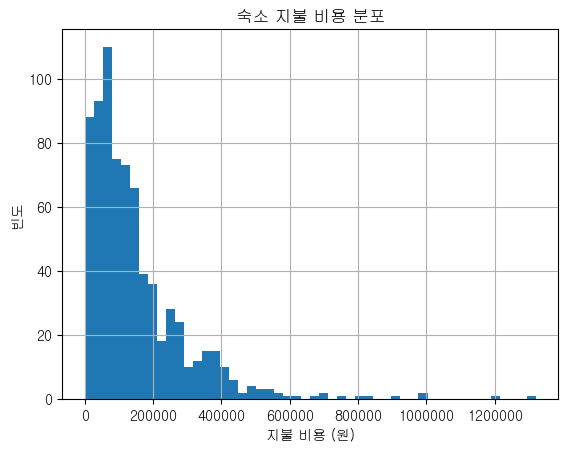

In [71]:
# PAYMENT_AMT_WON 시각화
df['PAYMENT_AMT_WON'].hist(bins=50)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("지불 비용 (원)")
plt.ylabel("빈도")
plt.title("숙소 지불 비용 분포")
plt.show()

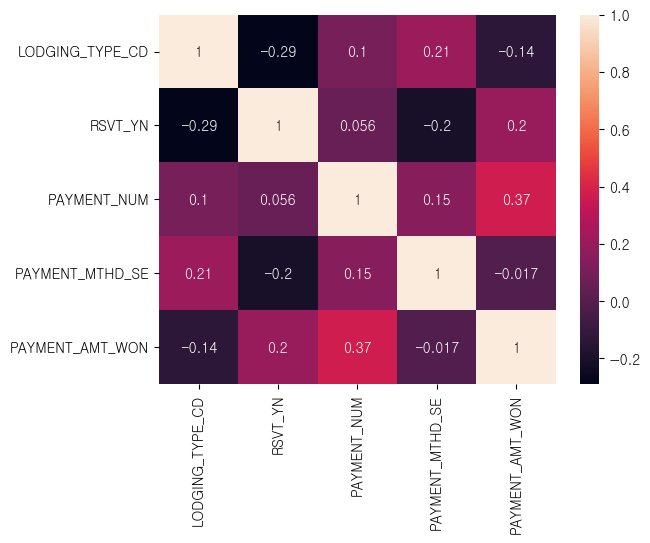

In [72]:
# 히트맵
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(data=corr_matrix, annot=True)
plt.show()